In [2]:
# Combined all primary and necessary functions and code in 1 notebook

In [3]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import re
import numpy as np

In [ ]:
# ALBUM REVIEW URL SCRAPING

# get ALL urls from pages 1-2006

# empty list
url_lst = []

# for loop get all pages
for x in range(0,2006):
    url = f"https://pitchfork.com/reviews/albums/?page={x+1}"
    
    html = requests.get(url).content
    soup = bs(html)
    
    urls = ["https://pitchfork.com" + j.get('href') for j in soup.select("div.review > a")]
    url_lst.append(urls)

# list flattening to prepare for df
flat_list = [i for j in url_lst for i in j]

# df conversion
df = pd.DataFrame(flat_list)
df.drop(columns="Unnamed: 0", axis=1, inplace=True)

# df to csv file and checking
df.to_csv('album_review_urls_4.csv')
pd.read_csv('album_review_urls_4.csv')

In [4]:
# REPLACE NULL VALUES FUNCTIONS

# key for album_rating function
rating_key = "div.score-circle > span.score"

# album_rating function
def rating_extract(soup, key):
    parse = soup.select(key)
    if parse == []:
        return np.nan
    else:
        return parse[0].text

# key for album_name function
album_name_key = "h1"

# album_name function
def album_name_extract(soup, key):
    parse = soup.select(key)
    if parse == []:
        return np.nan
    else:
        return parse[0].text

# key for artist_name function
artist_name_key = "h2"

# artist_name function
def artist_name_extract(soup, key):
    parse = soup.select(key)
    if parse == []:
        return np.nan
    else:
        return parse[0].text

# key for album_year function
year_key = "span.single-album-tombstone__meta-year"

# album_year function
def year_extract(soup, key):
    parse = soup.select(key)
    pattern = r"\d+"
    parse2 = re.findall(pattern, parse[0].text)
    if parse2 == []:
        return np.nan
    else:
        return parse2[0]

# key for record_label function
label_key = "li.labels-list__item"

# record_label function
def label_extract(soup, key):
    parse = soup.select(key)
    if parse == []:
        return np.nan
    else:
        return parse[0].text

In [5]:
# FINAL WEB SCRAPING CODE
# need to check new length of urls list to determine the range for for loop

# empty lists
album_ratings_lst = []
album_names_lst = []
artist_names_lst = []
album_years_lst = []
record_labels_lst = []
    
# url list
album_review_urls_df = pd.read_csv('album_review_urls_3.csv')
album_review_urls_df.drop(columns="Unnamed: 0", axis=1, inplace=True)
album_review_urls_lst = list(album_review_urls_df["0"])
urls = album_review_urls_lst

for x in range(0,300):
    html = requests.get(urls[x]).content
    soup = bs(html)
    
    # album ratings
    album_ratings = rating_extract(soup, rating_key)
    album_ratings_lst.append(album_ratings)
    
    # album names
    album_names = album_name_extract(soup, album_name_key)
    album_names_lst.append(album_names)
    
    # artist names
    artist_names = artist_name_extract(soup, artist_name_key)
    artist_names_lst.append(artist_names)
    
    # album years
    album_years = year_extract(soup, year_key)
    album_years_lst.append(album_years)
    
    # record labels
    record_labels = label_extract(soup, label_key)
    record_labels_lst.append(record_labels)
    
print(len(album_ratings_lst))
print(len(album_names_lst))
print(len(artist_names_lst))
print(len(album_years_lst))
print(len(record_labels_lst))

300
300
300
300
300


In [7]:
print(album_ratings_lst)
print(album_names_lst)
print(artist_names_lst)
print(album_years_lst)
print(record_labels_lst)

['9.2', '7.4', '8.0', '6.8', '8.5', '6.6', '7.5', '7.7', '7.4', '7.5', '7.2', '7.4', '3.6', '7.7', '7.6', '7.8', '8.2', '7.3', '7.5', '6.4', '7.5', '7.8', '8.4', '8.0', '7.8', '5.7', '7.3', '8.0', '7.4', '7.6', '9.4', '7.8', '5.0', '7.3', '8.2', '7.8', '7.4', '7.2', '7.6', '7.4', '7.6', '7.4', '8.4', '8.4', '7.7', '6.8', '7.8', '7.4', '7.1', '6.9', '7.5', '8.0', '7.0', '3.6', '7.6', '7.3', '8.0', '7.4', '7.0', '6.3', '5.6', '7.0', '7.5', '7.8', '7.4', '9.1', '7.3', '7.0', '6.3', '7.9', '5.1', '8.0', '6.8', '7.5', '6.8', '7.2', '6.6', '7.4', '7.7', '5.5', '7.4', '7.2', '8.0', '8.0', '7.2', '7.7', '7.5', '7.3', '6.6', '7.7', '6.9', '6.8', '7.6', '7.5', '7.1', '7.4', '6.8', '4.9', '8.0', '7.5']
['Kid A Mnesia', 'Voyage', 'Raw Demoon Alchemy (A Lone Operation)', 'Arm’s Length EP', 'Valentine', 'Projector', 'HOUSE OF CONFUSION', 'Pohorylle', 'Something for Thee Hotties', 'The Path of the Clouds', 'Candy Racer', 'Soul Controller', '=', 'Lily We Need to Talk Now', 'Mandatory Enjoyment', 'Reti

In [71]:
# create df from all lists and check

final_pitchfork_df = pd.DataFrame({"album_names":album_names_lst, "artist_names":artist_names_lst, "album_years":album_years_lst,
              "record_label":record_labels_lst, "album_ratings":album_ratings_lst})

final_pitchfork_df

,album_names,artist_names,album_years,record_label,album_ratings
0,Kid A Mnesia,Radiohead,2021,XL,9.2
1,Voyage,ABBA,2021,Capitol,7.4
2,Raw Demoon Alchemy (A Lone Operation),Darius Jones,2021,Northern Spy,8.0
3,Arm’s Length EP,Leo Bhanji,2021,Dirty Hit,6.8
4,Valentine,Snail Mail,2021,Matador,8.5
...,...,...,...,...,...
295,Peppa’s Adventures: The Album,Peppa Pig,2021,eOne,6.5
296,Take the Sadness Out of Saturday Night,Bleachers,2021,RCA,6.2
297,Crowlink EP,Shirley Collins,2021,Domino,7.4
298,Ngủ Ngày Ngay Ngày Tận Thế,Rắn Cạp Đuôi,2021,Subtext,7.8


In [72]:
final_pitchfork_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   album_names    300 non-null    object
 1   artist_names   300 non-null    object
 2   album_years    299 non-null    object
 3   record_label   296 non-null    object
 4   album_ratings  300 non-null    object
dtypes: object(5)
memory usage: 11.8+ KB


In [73]:
final_pitchfork_df.describe()

,album_names,artist_names,album_years,record_label,album_ratings
count,300,300,299,296,300
unique,300,296,12,220,45
top,I Want the Door to Open,Various Artists,2021,Interscope,7.4
freq,1,5,286,6,29


In [74]:
# convert ratings into floats

ratings_series = final_pitchfork_df["album_ratings"]

final_pitchfork_df["album_ratings"] = pd.to_numeric(ratings_series, errors="coerce")

In [75]:
# convert years into integers
# NOT working

years_series = final_pitchfork_df["album_years"]

final_pitchfork_df["album_years"] = pd.to_numeric(years_series, errors="coerce", downcast="integer")

In [76]:
final_pitchfork_df

,album_names,artist_names,album_years,record_label,album_ratings
0,Kid A Mnesia,Radiohead,2021.0,XL,9.2
1,Voyage,ABBA,2021.0,Capitol,7.4
2,Raw Demoon Alchemy (A Lone Operation),Darius Jones,2021.0,Northern Spy,8.0
3,Arm’s Length EP,Leo Bhanji,2021.0,Dirty Hit,6.8
4,Valentine,Snail Mail,2021.0,Matador,8.5
...,...,...,...,...,...
295,Peppa’s Adventures: The Album,Peppa Pig,2021.0,eOne,6.5
296,Take the Sadness Out of Saturday Night,Bleachers,2021.0,RCA,6.2
297,Crowlink EP,Shirley Collins,2021.0,Domino,7.4
298,Ngủ Ngày Ngay Ngày Tận Thế,Rắn Cạp Đuôi,2021.0,Subtext,7.8


In [77]:
# analysis testing

# artists w/ highest average rating and # of albums
final_pitchfork_df.groupby("artist_names").agg({"album_names": "count","album_ratings": "mean"})

,album_names,album_ratings
artist_names,,
$uicideboy$,1,6.7
---__--___,1,7.6
A Great Big Pile of Leaves,1,7.2
ABBA,1,7.4
AK Bandamont,1,7.4
...,...,...
d’Eon,1,7.4
"quickly, quickly",1,8.1
quinn,1,7.7


In [78]:
# analysis testing

# labels with the highest average rating, by # of albums
final_pitchfork_df.groupby("record_label").agg({"album_names": "count","album_ratings": "mean"})

,album_names,album_ratings
record_label,,
!K7,1,6.9
100% Silk,1,7.4
20 Buck Spin,1,7.3
20/20/20,1,7.2
2MR,1,7.5
...,...,...
ZTT,1,7.4
eOne,1,6.5
pgLang,1,6.4


In [79]:
# analysis testing

# years with the highest average rating, by # of albums
final_pitchfork_df.groupby("album_years").agg({"album_names": "count","album_ratings": "mean"})

,album_names,album_ratings
album_years,,
1968.0,1,8.700000
1969.0,1,10.000000
1981.0,1,9.100000
1982.0,1,8.400000
1984.0,1,10.000000
1991.0,1,7.400000
1993.0,1,8.500000
1995.0,1,6.700000
1996.0,2,8.100000


In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Avg Album Rating')

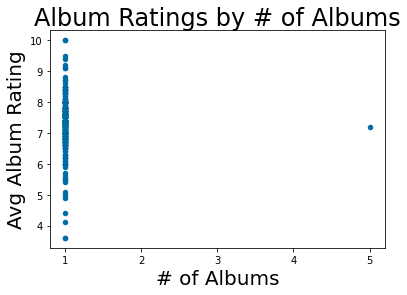

In [94]:
# visualization testing (pandas)

# artists w/ highest average rating and # of albums
final_pitchfork_df.groupby("artist_names").agg({"album_names": "count","album_ratings": "mean"}).plot(kind="scatter", x="album_names", y="album_ratings")

# styling
plt.style.use("classic")
plt.title("Album Ratings by # of Albums", fontsize=24)

plt.xlabel("# of Albums", fontsize=20)
plt.ylabel("Avg Album Rating", fontsize=20)

Text(0, 0.5, 'Avg Album Rating')

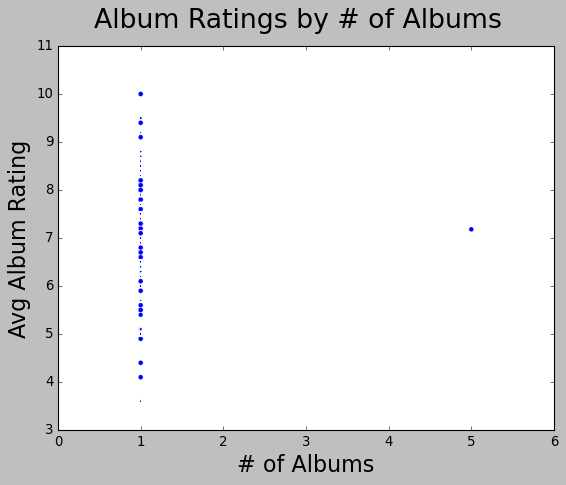

In [110]:
# visualization testing (matplotlib)

# artists w/ highest average rating and # of albums
df1 = final_pitchfork_df.groupby("artist_names").agg({"album_names": "count","album_ratings": "mean"})

#plotting
sns.scatterplot(data=df1, x="album_names", y="album_ratings", style="artist_names", legend=False)

plt.style.use("seaborn-deep")
plt.suptitle("Artist Album Ratings by # of Albums", fontsize=24)
plt.xlabel("# of Albums", fontsize=20)
plt.ylabel("Avg Album Rating", fontsize=20)

<AxesSubplot:xlabel='album_names', ylabel='album_ratings'>

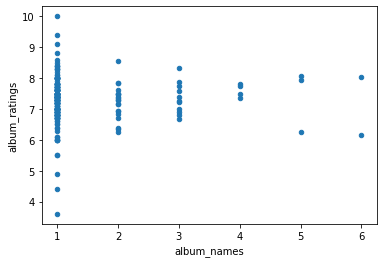

In [83]:
# visualization testing

# labels with the highest average rating, by # of albums
final_pitchfork_df.groupby("record_label").agg({"album_names": "count","album_ratings": "mean"}).plot(kind="scatter", x="album_names", y="album_ratings")

Text(0, 0.5, 'Avg Album Rating')

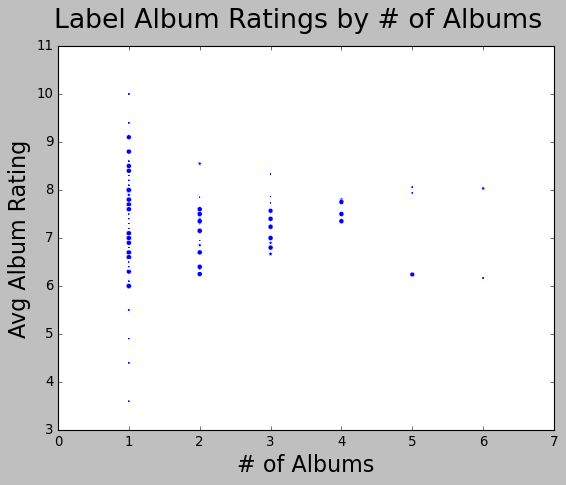

In [111]:
# visualization testing (matplotlib)

# labels with the highest average rating, by # of albums
df2 = final_pitchfork_df.groupby("record_label").agg({"album_names": "count","album_ratings": "mean"})

#plotting
sns.scatterplot(data=df2, x="album_names", y="album_ratings", style="record_label", legend=False)

plt.style.use("seaborn-deep")
plt.suptitle("Label Album Ratings by # of Albums", fontsize=24)
plt.xlabel("# of Albums", fontsize=20)
plt.ylabel("Avg Album Rating", fontsize=20)

Text(0, 0.5, 'Avg Album Rating')

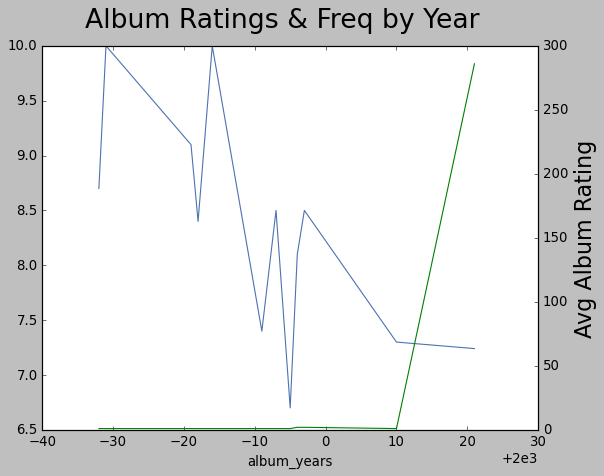

In [117]:
# visualization testing

# years with the highest average rating, by # of albums
final_pitchfork_df.groupby("album_years").agg({"album_names": "count","album_ratings": "mean"})["album_ratings"].plot(x="album_years")

final_pitchfork_df.groupby("album_years").agg({"album_names": "count","album_ratings": "mean"})["album_names"].plot(secondary_y=True, style="g")

plt.style.use("seaborn-deep")
plt.suptitle("Album Ratings & Freq by Year", fontsize=24)
plt.xlabel("# of Albums", fontsize=20)
plt.ylabel("Avg Album Rating", fontsize=20)